In [1]:
import pandas as pd
import numpy as np

##### In this Toy project , we're going to predict wheather the student will get placed or not , based on the cgpa, iq (independent variable) and the ouput variable(placement) is also present which means this is a supervised problem.

# Steps
0. Preprocess the data + EDA + Feature Selection
1. Extract input and outpot labels
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model
6. Deploy the model


In [2]:
df = pd.read_csv("placement.csv")

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [10]:
df = df.loc[:,"cgpa":]

In [11]:
df.shape

(100, 3)

In [12]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [13]:
import matplotlib.pyplot as plt

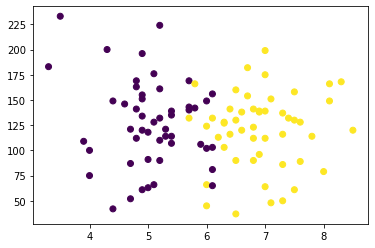

In [23]:
plt.scatter(df['cgpa'] , df['iq'], c = df['placement'])


In [24]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [29]:
X.ndim

2

In [30]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test = train_test_split(X,Y, test_size=0.1)

In [31]:
y_test

99    1
81    0
68    0
30    1
0     1
86    0
20    1
76    0
17    0
69    1
Name: placement, dtype: int64

In [32]:
x_test

,cgpa,iq
99,6.2,113.0
81,5.4,107.0
68,4.0,75.0
30,7.6,128.0
0,6.8,123.0
86,5.1,128.0
20,6.6,120.0
76,4.9,155.0
17,3.3,183.0
69,8.5,120.0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(x_train)

In [35]:
X_test = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

In [40]:
clf.fit(X_train , y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(X_test)

In [42]:
y_test

99    1
81    0
68    0
30    1
0     1
86    0
20    1
76    0
17    0
69    1
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test , y_pred)

1.0

In [51]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

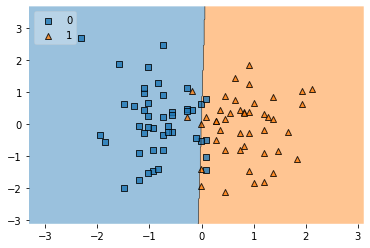

In [53]:
plot_decision_regions(X_train,y_train.values ,clf =clf , legend= 2)

In [54]:
import pickle

In [55]:
pickle.dump(clf,open('model.pk1', 'wb'))